In [97]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder

In [5]:
data = pd.read_csv('/Users/cr24/Desktop/Data Science Assignment/Assignment.csv')
data = data.rename(columns= {'duree': 'expo','nbrtotan': 'freq','nbrtotc': 'nclaims'})
data["sev"] = data['chargtot']/data['nclaims']
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163657 entries, 0 to 163656
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEPH     163657 non-null  int64  
 1   CODPOSS   163657 non-null  int64  
 2   expo      163657 non-null  float64
 3   lnexpo    163657 non-null  float64
 4   nclaims   163657 non-null  int64  
 5   freq      163657 non-null  float64
 6   chargtot  163657 non-null  float64
 7   agecar    163657 non-null  object 
 8   sexp      163657 non-null  object 
 9   fuelc     163657 non-null  object 
 10  split     163657 non-null  object 
 11  usec      163657 non-null  object 
 12  fleetc    163657 non-null  object 
 13  sportc    163657 non-null  object 
 14  coverp    163657 non-null  object 
 15  powerc    163657 non-null  object 
 16  sev       18345 non-null   float64
dtypes: float64(5), int64(3), object(9)
memory usage: 21.2+ MB


,AGEPH,CODPOSS,expo,lnexpo,nclaims,freq,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc,sev
0,64,1000,1.000000,0.000000,0,0.000000,0.000000,2-5,Female,Petrol,Once,Private,No,No,MTPL+,66-110,NaN
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110,155.974606
2,58,1000,0.402740,-0.909465,0,0.000000,0.000000,>10,Female,Petrol,Thrice,Private,No,No,MTPL,<66,NaN
3,37,1030,0.169863,-1.772763,0,0.000000,0.000000,2-5,Female,Petrol,Once,Professional,No,No,MTPL+++,66-110,NaN
4,29,1030,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,Once,Private,No,No,MTPL+,<66,NaN


In [6]:
KULbg =  "#116E8A"

SUMMARY STATISTICS:
1. FREQUENCY OF CLAIMS

In [7]:
freq_of_claims = data.groupby('nclaims').agg(tot_obs = ('nclaims','count',),tot_exp=('expo','sum'))
freq_of_claims.reset_index(inplace=True)
freq_of_claims

,nclaims,tot_obs,tot_exp
0,0,145312,128595.947945
1,1,16602,15410.320548
2,2,1562,1447.301370
3,3,162,150.454795
4,4,17,14.328767
5,5,2,1.375342


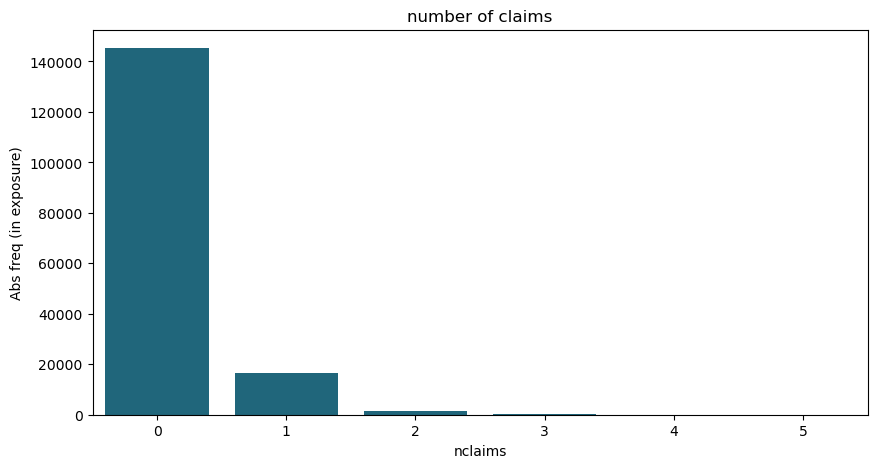

In [8]:
plt.figure(figsize = (10, 5))
sns.barplot(data=freq_of_claims,x='nclaims',y='tot_obs',color=KULbg)
plt.ylabel("Abs freq (in exposure)")
plt.xlabel("nclaims")
plt.title('number of claims')
plt.show()

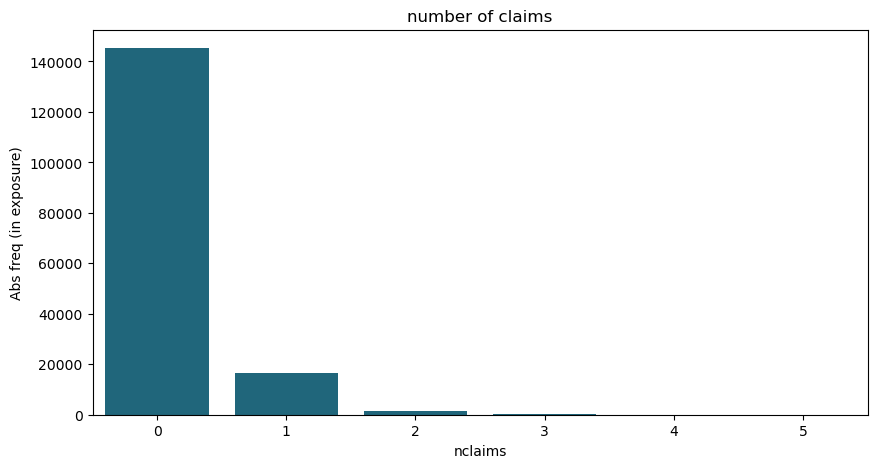

In [9]:
plt.figure(figsize = (10, 5))
sns.barplot(data=freq_of_claims,x='nclaims',y='tot_obs',color=KULbg)
plt.ylabel("Abs freq (in exposure)")
plt.xlabel("nclaims")
plt.title('number of claims')
plt.show()

SUMMARY STATISTICS:
- 2. SEVERITY OF CLAIMS

In [10]:
pos_sev = data[data['sev']>0]
pos_sev.head()

,AGEPH,CODPOSS,expo,lnexpo,nclaims,freq,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc,sev
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110,155.974606
12,72,1050,1.000000,0.000000,1,1.000000,1426.379342,2-5,Female,Petrol,Once,Private,No,No,MTPL+++,66-110,1426.379342
15,28,1060,0.956164,-0.044825,2,2.091691,1576.354924,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110,788.177462
20,52,1070,0.452055,-0.793952,3,6.636364,8885.396345,6-10,Female,Petrol,Monthly,Private,No,Yes,MTPL,>110,2961.798782
22,56,1082,1.000000,0.000000,1,1.000000,619.733812,0-1,Female,Petrol,Once,Private,No,No,MTPL+,66-110,619.733812


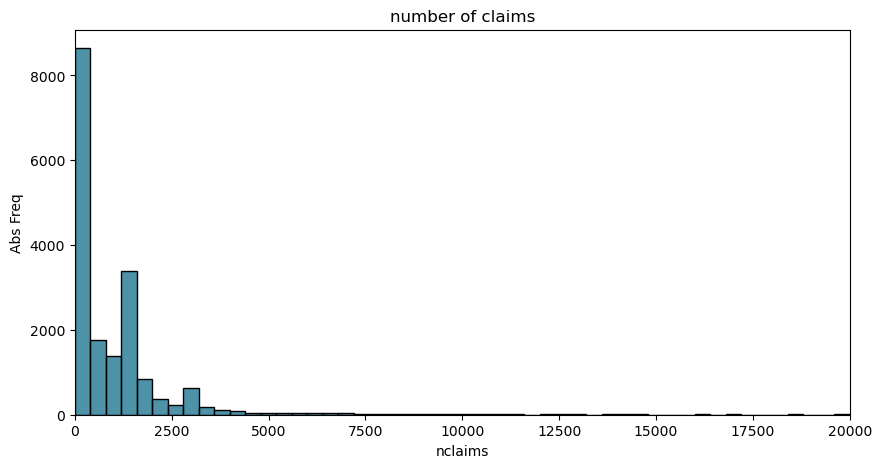

In [11]:
plt.figure(figsize = (10, 5))
sns.histplot(data=pos_sev, x='sev',stat='count',color=KULbg, bins = 50, binrange=[0,20000])
plt.ylabel("Abs Freq")
plt.xlabel("nclaims")
plt.xlim(0,20000)
plt.title('number of claims')
plt.show()

FUNCTION

In [12]:
def grouped(x):
    grouped = data.groupby(x).agg({
    'nclaims':'sum',
    'expo': 'sum',
    'chargtot': 'sum'
    })
    grouped['absph'] = data[x].value_counts()
    grouped['relph'] = grouped['absph']/grouped['absph'].sum()
    grouped['emp_freq'] = grouped['nclaims']/grouped['expo']
    grouped.reset_index(inplace=True)
    return   grouped

Info on the data typs

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163657 entries, 0 to 163656
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEPH     163657 non-null  int64  
 1   CODPOSS   163657 non-null  int64  
 2   expo      163657 non-null  float64
 3   lnexpo    163657 non-null  float64
 4   nclaims   163657 non-null  int64  
 5   freq      163657 non-null  float64
 6   chargtot  163657 non-null  float64
 7   agecar    163657 non-null  object 
 8   sexp      163657 non-null  object 
 9   fuelc     163657 non-null  object 
 10  split     163657 non-null  object 
 11  usec      163657 non-null  object 
 12  fleetc    163657 non-null  object 
 13  sportc    163657 non-null  object 
 14  coverp    163657 non-null  object 
 15  powerc    163657 non-null  object 
 16  sev       18345 non-null   float64
dtypes: float64(5), int64(3), object(9)
memory usage: 21.2+ MB


Bin CODPOSS

In [14]:
def categorize_postal_code(code):
    if 1000 <= code <= 1299:
        return 'Brussels Hoofdstedelijk Gewest'
    elif 1300 <= code <= 1499:
        return 'Provincie Waals-Brabant'
    elif 1500 <= code <= 1999 or 3000 <= code <= 3499:
        return 'Provincie Vlaams-Brabant'
    elif 2000 <= code <= 2999:
        return 'Provincie Antwerpen'
    elif 3500 <= code <= 3999:
        return 'Provincie Limburg'
    elif 4000 <= code <= 4999:
        return 'Provincie Luik'
    elif 5000 <= code <= 5999:
        return 'Provincie Namen'
    elif 6000 <= code <= 6599 or 7000 <= code <= 7999:
        return 'Provincie Henegouwen'
    elif 6600 <= code <= 6999:
        return 'Provincie Luxemburg'
    elif 8000 <= code <= 8999:
        return 'Provincie West-Vlaanderen'
    elif 9000 <= code <= 9999:
        return 'Provincie Oost-Vlaanderen'
    else:
        return 'Unknown'
    
data['region'] = data['CODPOSS'].apply(categorize_postal_code)
data

,AGEPH,CODPOSS,expo,lnexpo,nclaims,freq,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc,sev,region
0,64,1000,1.000000,0.000000,0,0.000000,0.000000,2-5,Female,Petrol,Once,Private,No,No,MTPL+,66-110,NaN,Brussels Hoofdstedelijk Gewest
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110,155.974606,Brussels Hoofdstedelijk Gewest
2,58,1000,0.402740,-0.909465,0,0.000000,0.000000,>10,Female,Petrol,Thrice,Private,No,No,MTPL,<66,NaN,Brussels Hoofdstedelijk Gewest
3,37,1030,0.169863,-1.772763,0,0.000000,0.000000,2-5,Female,Petrol,Once,Professional,No,No,MTPL+++,66-110,NaN,Brussels Hoofdstedelijk Gewest
4,29,1030,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,Once,Private,No,No,MTPL+,<66,NaN,Brussels Hoofdstedelijk Gewest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163652,50,9960,1.000000,0.000000,0,0.000000,0.000000,2-5,Male,Petrol,Once,Private,No,No,MTPL+,<66,NaN,Provincie Oost-Vlaanderen
163653,86,9960,1.000000,0.000000,0,0.000000,0.000000,6-10,Male,Petrol,Once,Private,No,No,MTPL,<66,NaN,Provincie Oost-Vlaanderen
163654,64,9960,1.000000,0.000000,0,0.000000,0.000000,2-5,Male,Petrol,Twice,Private,No,No,MTPL,<66,NaN,Provincie Oost-Vlaanderen
163655,58,9970,1.000000,0.000000,1,1.000000,3177.994988,>10,Male,Petrol,Once,Private,Yes,No,MTPL,<66,3177.994988,Provincie Oost-Vlaanderen


In [15]:
for c in ["agecar","sexp","fuelc","split","usec","fleetc","sportc","coverp","powerc","region"]:
    data[c]=pd.Categorical(data[c])

GENERALIZED LINEAR MODELS: FREQUENCY

In [49]:
# Define the bin edges
bin_edges = [18,20,25,30,35,40,50,55,60,65,70,75,80, float('inf')]  # Adjust these as needed

# Create labels for the bins
bin_labels = []

# Bin the AGEH variable
data['AGEPH_binned'] = pd.cut(data['AGEPH'], bins=bin_edges, right=False)


In [28]:
data.expo

0         1.000000
1         0.046575
2         0.402740
3         0.169863
4         1.000000
            ...   
163652    1.000000
163653    1.000000
163654    1.000000
163655    1.000000
163656    1.000000
Name: expo, Length: 163657, dtype: float64

In [52]:
y=data['nclaims']
x=data.drop('nclaims', axis=1)

In [ ]:
from sklearn.metrics import mean_poisson_deviance

In [99]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [76]:
glm_freq_age = smf.glm('nclaims ~ AGEPH_binned + agecar + powerc + coverp + fuelc + fleetc + region + AGEPH_binned*powerc ', data=data_train, exposure=data_train.expo, family=sm.families.Poisson(link=sm.families.links.Log())).fit()
print(glm_freq_age.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:               130923
Model:                            GLM   Df Residuals:                   130868
Model Family:                 Poisson   Df Model:                           54
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -50291.
Date:                Mon, 20 May 2024   Deviance:                       70297.
Time:                        01:53:06   Pearson chi2:                 1.55e+05
No. Iterations:                   100   Pseudo R-squ. (CS):            0.01353
Covariance Type:            nonrobust                                         
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

In [77]:
risk_factors_freq = pd.DataFrame(glm_freq_age.tvalues.sort_values(ascending=False), columns=['tvalues'])
risk_factors_freq

,tvalues
"AGEPH_binned[T.Interval(80.0, inf, closed='left')]:powerc[T.<66]",0.873160
"AGEPH_binned[T.Interval(75.0, 80.0, closed='left')]:powerc[T.<66]",0.571401
"AGEPH_binned[T.Interval(60.0, 65.0, closed='left')]:powerc[T.<66]",0.387170
"AGEPH_binned[T.Interval(40.0, 50.0, closed='left')]:powerc[T.<66]",0.352002
"AGEPH_binned[T.Interval(30.0, 35.0, closed='left')]:powerc[T.<66]",0.322625
"AGEPH_binned[T.Interval(70.0, 75.0, closed='left')]:powerc[T.<66]",0.280333
"AGEPH_binned[T.Interval(55.0, 60.0, closed='left')]:powerc[T.<66]",0.278770
"AGEPH_binned[T.Interval(20.0, 25.0, closed='left')]:powerc[T.<66]",0.275984
powerc[T.>110],0.251162
"AGEPH_binned[T.Interval(35.0, 40.0, closed='left')]:powerc[T.<66]",0.245590


In [79]:
coeff_freq_glm_backward = pd.DataFrame(glm_freq_age.params, columns=['params'])

risk_factors_freq = pd.DataFrame(glm_freq_age.tvalues.sort_values(ascending=False), columns=['tvalues'])
risk_factors_freq = pd.merge(risk_factors_freq, coeff_freq_glm_backward, how='left', left_index=True, right_index=True).drop(index='Intercept')
risk_factors_freq.style.background_gradient( axis=0, cmap= 'plasma')

,tvalues,params
"AGEPH_binned[T.Interval(80.0, inf, closed='left')]:powerc[T.<66]",0.873160,0.531651
"AGEPH_binned[T.Interval(75.0, 80.0, closed='left')]:powerc[T.<66]",0.571401,0.320332
"AGEPH_binned[T.Interval(60.0, 65.0, closed='left')]:powerc[T.<66]",0.387170,0.211434
"AGEPH_binned[T.Interval(40.0, 50.0, closed='left')]:powerc[T.<66]",0.352002,0.190625
"AGEPH_binned[T.Interval(30.0, 35.0, closed='left')]:powerc[T.<66]",0.322625,0.175111
"AGEPH_binned[T.Interval(70.0, 75.0, closed='left')]:powerc[T.<66]",0.280333,0.154100
"AGEPH_binned[T.Interval(55.0, 60.0, closed='left')]:powerc[T.<66]",0.278770,0.151730
"AGEPH_binned[T.Interval(20.0, 25.0, closed='left')]:powerc[T.<66]",0.275984,0.150842
powerc[T.>110],0.251162,187262837766.784363
"AGEPH_binned[T.Interval(35.0, 40.0, closed='left')]:powerc[T.<66]",0.245590,0.133293


In [87]:
data.columns

Index(['AGEPH', 'CODPOSS', 'expo', 'lnexpo', 'nclaims', 'freq', 'chargtot',
       'agecar', 'sexp', 'fuelc', 'split', 'usec', 'fleetc', 'sportc',
       'coverp', 'powerc', 'sev', 'region', 'AGEPH_binned'],
      dtype='object')

In [90]:
formula_freq = 'nclaims ~ AGEPH_binned + agecar + powerc + coverp + fuelc + fleetc + region + AGEPH_binned*powerc'

In [144]:
from sklearn.linear_model import PoissonRegressor
POI = PoissonRegressor(fit_intercept=True,max_iter=100000)

In [145]:
columns_all = ['AGEPH','agecar','fuelc','usec','fleetc','sportc','coverp','powerc']
x_train = X_train[columns_all]

In [157]:
# List of categorical variables
categorical_variables = ['agecar', 'fuelc', 'usec', 'fleetc', 'sportc', 'coverp', 'powerc']

# Encoding categorical variables one by one
pd.options.mode.copy_on_write = True
label_encoders = {}
for var in categorical_variables:
    label_encoders[var] = LabelEncoder()
    X_test[var] = label_encoders[var].fit_transform(X_test[var])

In [159]:
X_test=X_test[columns_all]

In [163]:
POI_fit = POI.fit(x_train,y_train)


In [160]:
y_pred = POI_fit.predict(X_test) 

In [165]:
mean_poisson_deviance(y_test,y_pred)

0.5494553542976384

In [141]:
POI_fit.coef_


array([-0.01454634,  0.00018484, -0.00382223,  0.00027915, -0.0004169 ,
        0.00016241, -0.00230222, -0.00076619])

In [142]:
param_grid = {
    'alpha': np.linspace(0,100,10),
}

gridsearc

In [147]:
POI_fit.score(x_train,y_train,sample_weight=X_train.expo)

ValueError: y_true and y_pred have different number of output (8!=1)

In [72]:
from scipy.stats import chi2

# Assuming mod_deviance and mod_df_resid are obtained from your model object
p_value = 1- chi2.cdf(50, 31)
p_value

0.016757268937175107

In [66]:
mean_poisson_deviance

0.13551606039307432

In [39]:
glm_freq_age.pvalues


Intercept                                9.366937e-05
AGEPH_binned[T.25-35]                    2.096783e-08
AGEPH_binned[T.35-50]                    1.078447e-24
AGEPH_binned[T.50-60]                    4.547295e-30
AGEPH_binned[T.61-70]                    1.839755e-38
AGEPH_binned[T.71-80]                    1.303576e-30
AGEPH_binned[T.81+]                      2.024573e-06
agecar[T.2-5]                            8.414637e-14
agecar[T.6-10]                           1.665984e-08
agecar[T.>10]                            9.106260e-06
powerc[T.<66]                            6.554036e-02
powerc[T.>110]                           1.110955e-01
coverp[T.MTPL+]                          2.472912e-14
coverp[T.MTPL+++]                        3.674817e-08
fuelc[T.Petrol]                          8.540221e-35
fleetc[T.Yes]                            7.719774e-04
usec[T.Professional]                     6.204516e-01
sportc[T.Yes]                            3.797538e-01
region[T.Provincie Antwerpen

In [16]:
glm_freq_age = smf.glm('nclaims ~ AGEPH + agecar + powerc + coverp + fuelc + fleetc + usec + sportc + region', data=data, exposure=data.expo,family=sm.families.Poisson(link=sm.families.links.log())).fit()
print(glm_freq_age.summary())

/Users/cr24/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:               163657
Model:                            GLM   Df Residuals:                   163634
Model Family:                 Poisson   Df Model:                           22
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63023.
Date:                Mon, 20 May 2024   Deviance:                       88212.
Time:                        00:54:54   Pearson chi2:                 1.95e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01195
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

GENERALIZED LINEAR MODELS: SEVERITY

In [17]:
glm_freq_sev = smf.glm('sev ~ AGEPH + agecar + powerc + coverp + fuelc + fleetc + usec + sportc + region', data=data, exposure=data.expo,family=sm.families.Poisson(link=sm.families.links.log())).fit()
print(glm_freq_age.summary())

/Users/cr24/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:               163657
Model:                            GLM   Df Residuals:                   163634
Model Family:                 Poisson   Df Model:                           22
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63023.
Date:                Mon, 20 May 2024   Deviance:                       88212.
Time:                        00:54:54   Pearson chi2:                 1.95e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01195
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In